[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 880
    # data points      = 16
    # variables        = 2
    chi-square         = 157767.134
    reduced chi-square = 11269.0810
    Akaike info crit   = 151.140587
    Bayesian info crit = 152.685764
[[Variables]]
    amplitude:  2.6575e-21 +/- 2.6754e-21 (100.68%) (init = 1)
    exponent:   13.9987258 +/- 0.25174078 (1.80%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, exponent) = -1.000


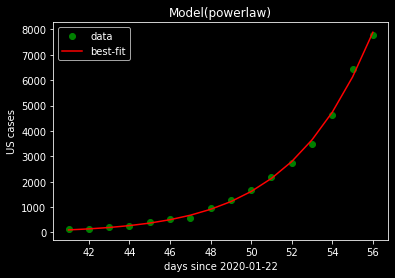

In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from lmfit import Model
from lmfit.models import PowerLawModel
from lmfit import fit_report

# Choosing a set of dataframes
pickle_name = 'df_us'

# Choosing a data type
df_type = 'cases'

pickle_file = open(f'../pickles/{pickle_name}''.p', 'rb')
df_us = pickle.load(pickle_file)[df_type]
pickle_file.close()

# Nonlinear least squares starting point, using LinearModel
df = df_us
df = df.loc[df['day'] > 40]
df = df.groupby('day').sum().reset_index()
df = df[['day', 'cases']]
model = PowerLawModel()
params = model.make_params()
result = model.fit(df.cases, params, x=df.day.to_list())
mpl.style.use('dark_background')
print(fit_report(result))
result.plot_fit(xlabel='days since 2020-01-22', ylabel='US cases', datafmt='og', fitfmt='r')